*Importing necessary libraries*

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [7]:
# Load the data
df = pd.read_csv('customer_churn_records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

*No duplicates found in the dataset*

*NOTE: For all categorical variables, e.g. exited, HasCrCard, isActiveMember..., 0 stands for NO while 1 stands for YES.*

*Illustration, if a customer's exit record shows 0, that means he/she didn't exit the bank and vice versa.*

In [126]:
df_8 = _dntk.execute_sql(
  '-- Churn Rate by Geography\nSELECT Geography, CAST(SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS REAL) * 100 / COUNT(*) AS ChurnRate\nFROM df\nGROUP BY Geography;',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_8

,Geography,ChurnRate
0,Spain,16.673395
1,Germany,32.443203
2,France,16.174711


In [114]:
df_2 = _dntk.execute_sql(
  '-- Relationship between Complaints and Churn\nSELECT Complain, COUNT(*) AS NumberOfCustomers, CAST(SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS REAL) * 100 / COUNT(*) AS ChurnRate\nFROM df\nGROUP BY Complain;',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_2

,Complain,NumberOfCustomers,ChurnRate
0,0,7956,0.050277
1,1,2044,99.510765


In [145]:
df_3 = _dntk.execute_sql(
  '-- Churn Rate by Geography and Gender\nSELECT Geography, Gender, AVG(CreditScore), AVG(Age), AVG(Balance), AVG(EstimatedSalary),\n       SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100 / COUNT(*) AS ChurnRate,\n       COUNT(*) AS NumberOfCustomers\nFROM df\nGROUP BY Geography, Gender\nORDER BY Geography, Gender;',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_3

,Geography,Gender,avg(CreditScore),avg(Age),avg(Balance),avg(EstimatedSalary),ChurnRate,NumberOfCustomers
0,France,Female,649.185759,38.773994,60322.670159,99564.252755,20.344980,2261
1,France,Male,650.064657,38.296404,63546.284875,100174.252495,12.749728,2753
2,Germany,Female,653.093881,40.154233,119145.966471,102446.424124,37.552389,1193
3,Germany,Male,649.966565,39.424772,120259.668222,99905.033959,27.811550,1316
4,Spain,Female,651.769513,39.199265,59862.092534,100734.107475,21.212121,1089
5,Spain,Male,650.992075,38.649135,63352.833746,98425.687680,13.112392,1388


In [147]:
df_6 = _dntk.execute_sql(
  '-- Churn Rate of Active vs. Inactive Members\nSELECT IsActiveMember, SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) * 100 / COUNT(*) AS ChurnRate\nFROM df\nGROUP BY IsActiveMember;',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_6

,IsActiveMember,ChurnRate
0,0,26.871519
1,1,14.269074


In [148]:
df_5 = _dntk.execute_sql(
  '-- Churn Rate by Card Type\nSELECT "Card Type", CAST(SUM(CASE WHEN Exited = 1 THEN 1 ELSE 0 END) AS REAL) * 100 / COUNT(*) AS ChurnRate\nFROM df\nGROUP BY "Card Type";',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_5

,Card Type,ChurnRate
0,GOLD,19.264587
1,SILVER,20.112179
2,DIAMOND,21.779018
3,PLATINUM,20.360722


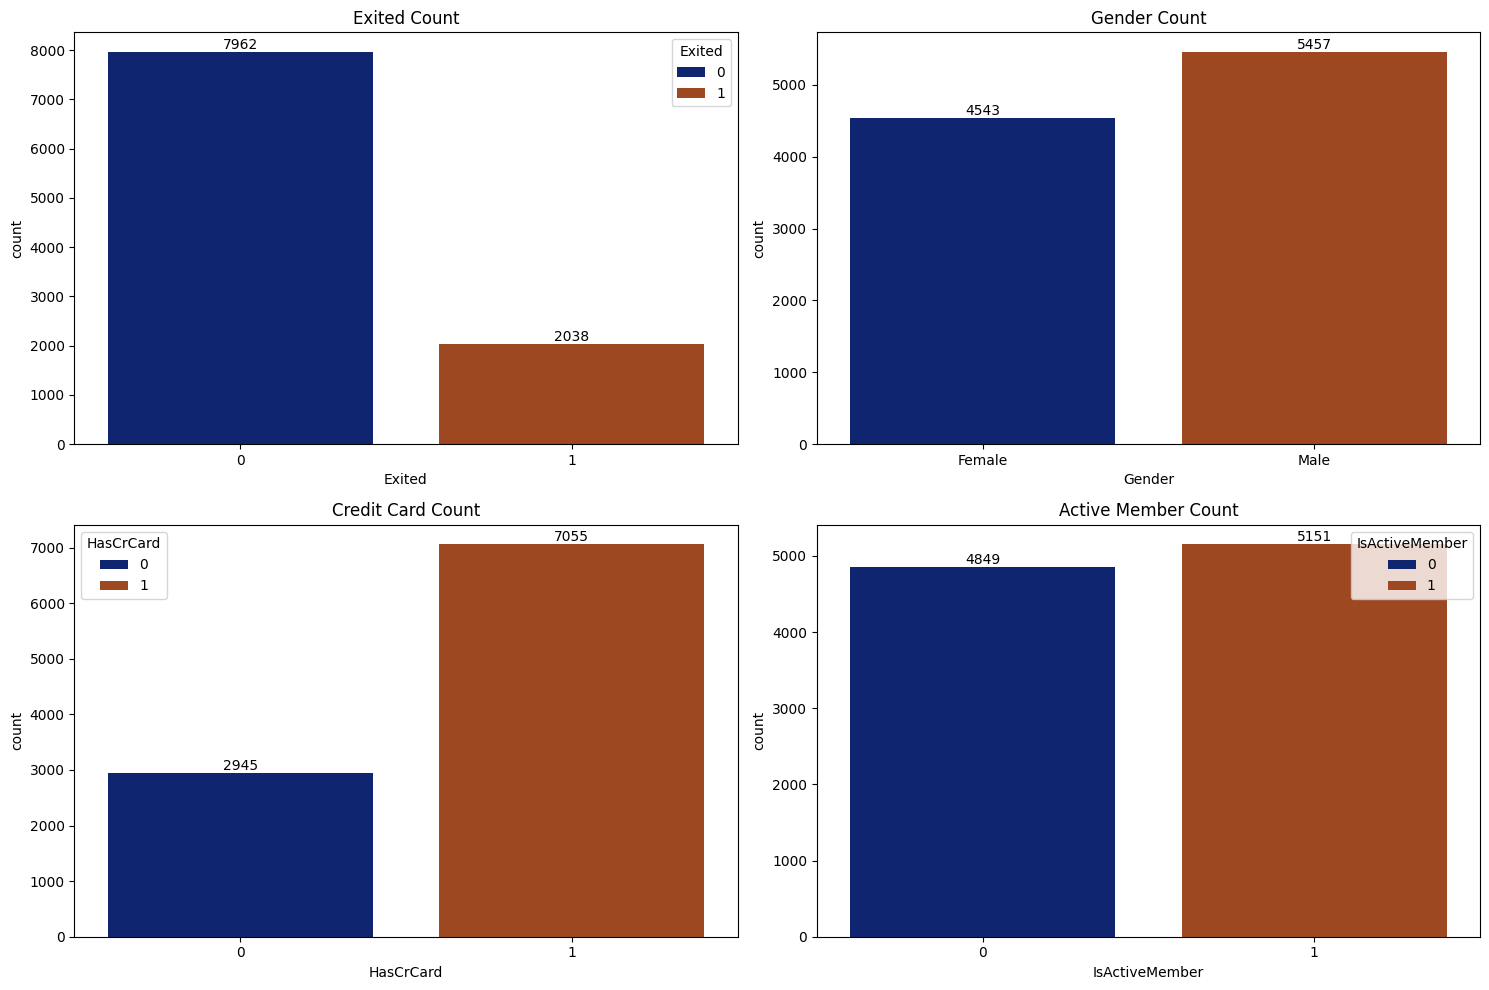

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot Exited Count
ax = sns.countplot(data=df, x='Exited', hue='Exited', palette='dark', ax=axes[0,0])
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Exited Count')

# Plot Gender Count
ax = sns.countplot(data=df, x='Gender', hue='Gender', palette='dark', ax=axes[0,1])
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('Gender Count')

# Plot Credit Card Count
ax = sns.countplot(data=df, x='HasCrCard', hue='HasCrCard', palette='dark', ax=axes[1,0])
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('Credit Card Count')

# Plot Active Member Count
ax = sns.countplot(data=df, x='IsActiveMember', hue='IsActiveMember', palette='dark', ax=axes[1,1])
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('Active Member Count')

# Adjust layout
plt.tight_layout()
plt.show()

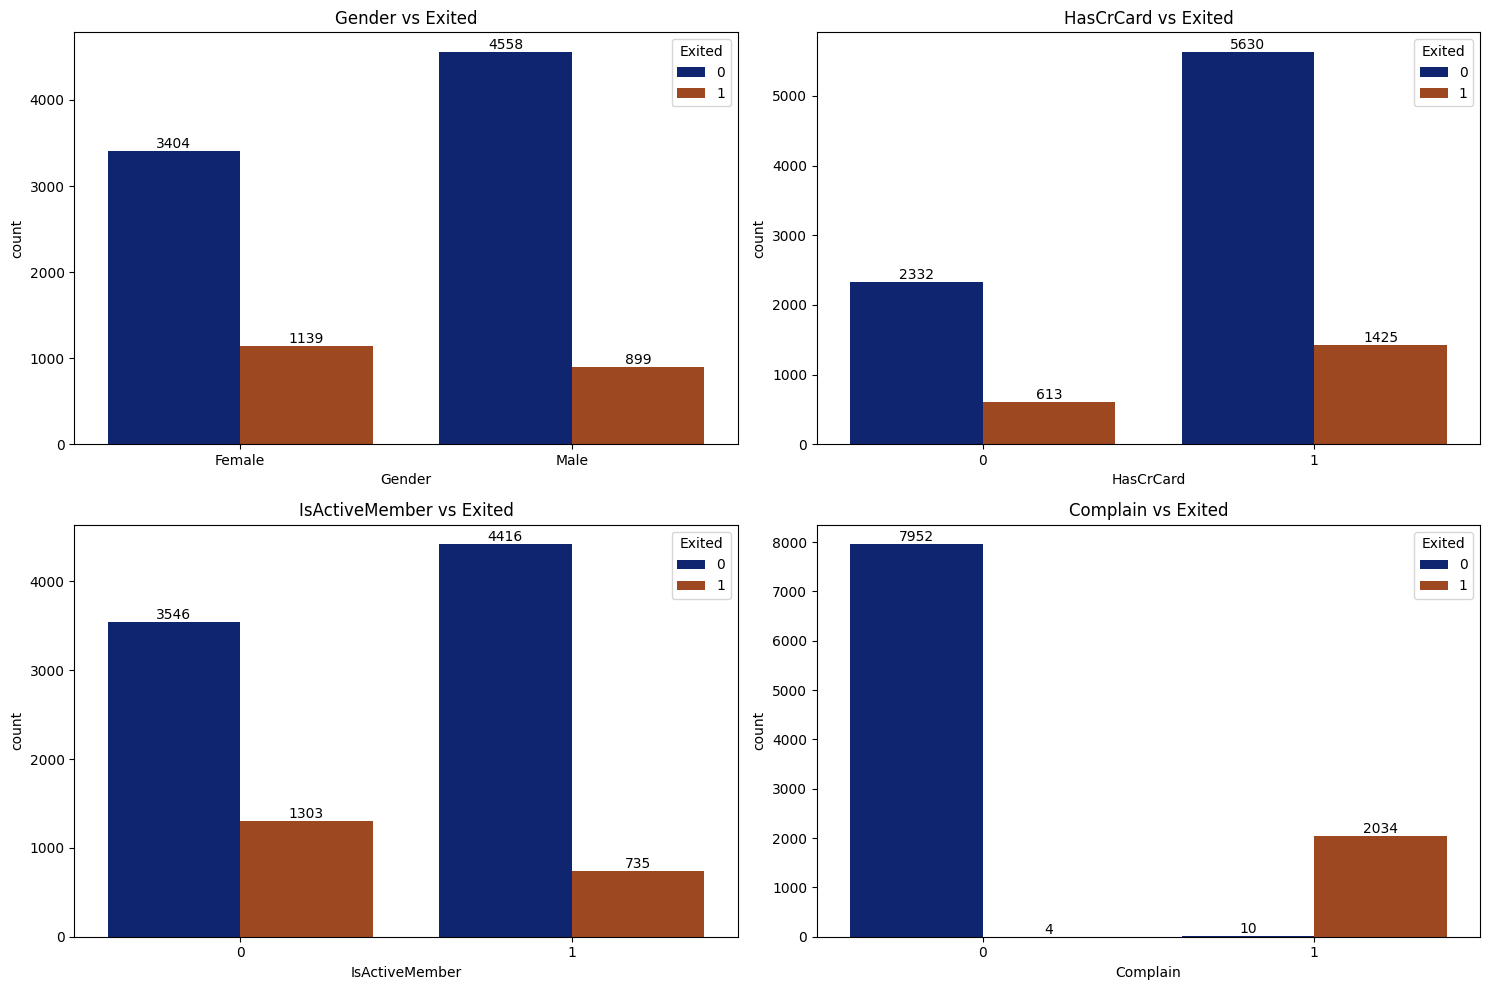

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

ax = sns.countplot(data=df, x='Gender', ax=axes[0,0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Gender vs Exited')

ax = sns.countplot(data=df, x='HasCrCard', ax=axes[0,1], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('HasCrCard vs Exited')

ax = sns.countplot(data=df, x='IsActiveMember', ax=axes[1,0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('IsActiveMember vs Exited')

ax = sns.countplot(data=df,x='Complain',ax=axes[1,1], hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('Complain vs Exited')


plt.tight_layout()
plt.show()

From the graphs above, it's evident that:
- People who are active members are less likely to exit the bank as well as those with credit cards.
- More females left the bank compared to thier male counterparts.
- lots of customers lodged complaints and most of them eventually left the bank.
- 20% left while 79.6% are still active customers.

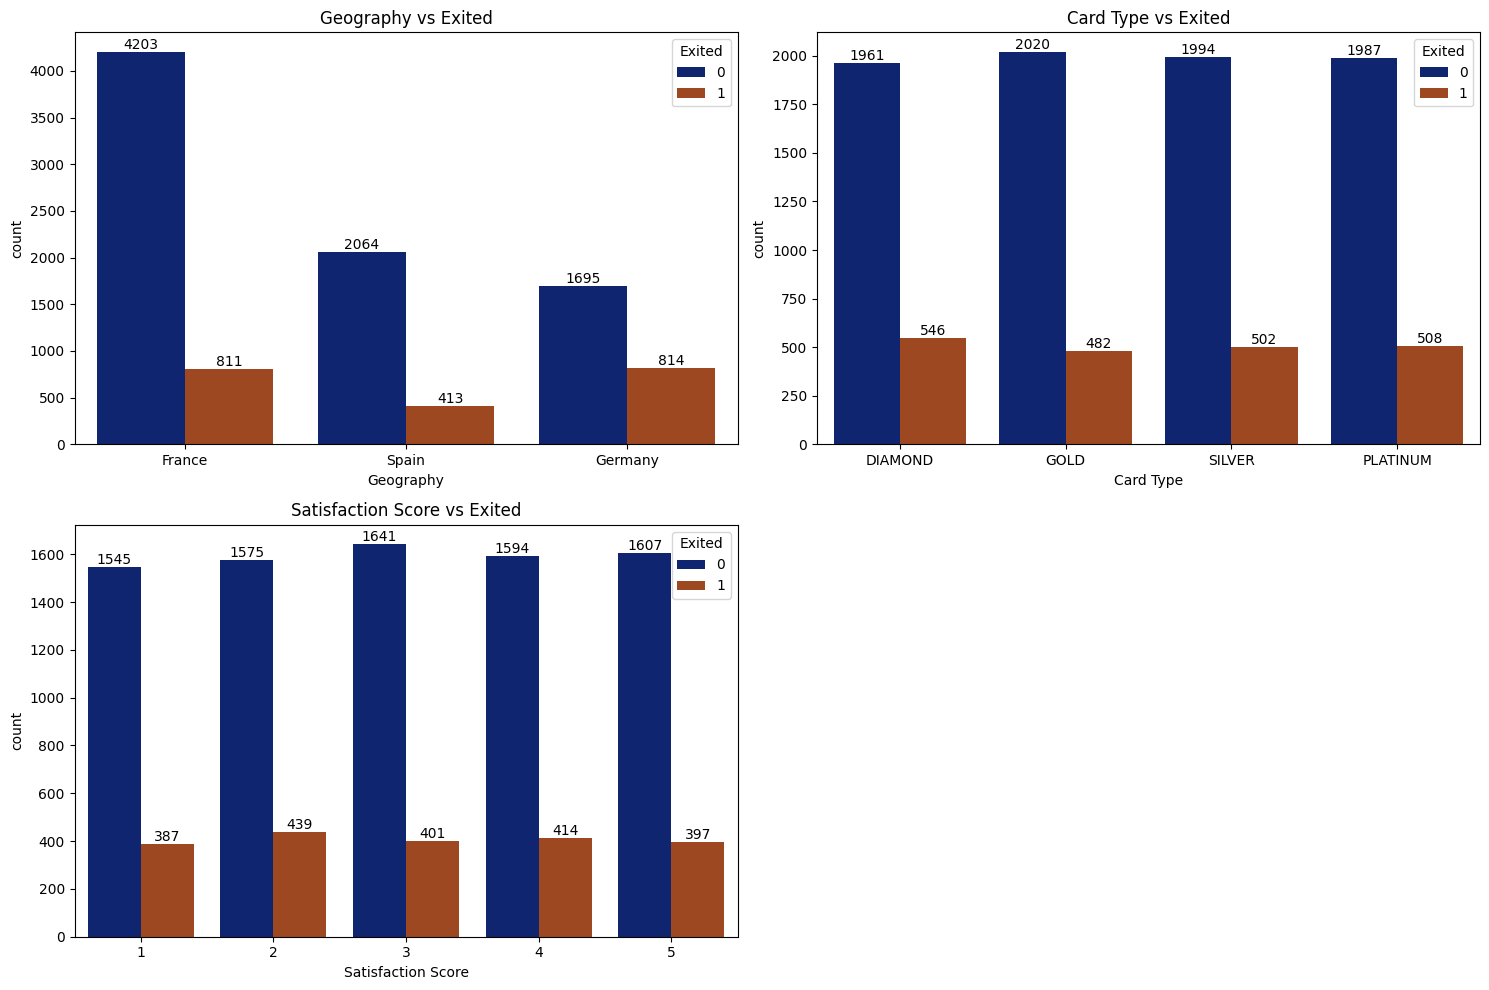

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax = sns.countplot(data=df, x='Geography', ax=axes[0, 0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0, 0].set_title('Geography vs Exited')

ax = sns.countplot(data=df, x='Card Type', ax=axes[0, 1], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0, 1].set_title('Card Type vs Exited')

ax = sns.countplot(data=df, x='Satisfaction Score', ax=axes[1, 0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1, 0].set_title('Satisfaction Score vs Exited')

# Remove the unused subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

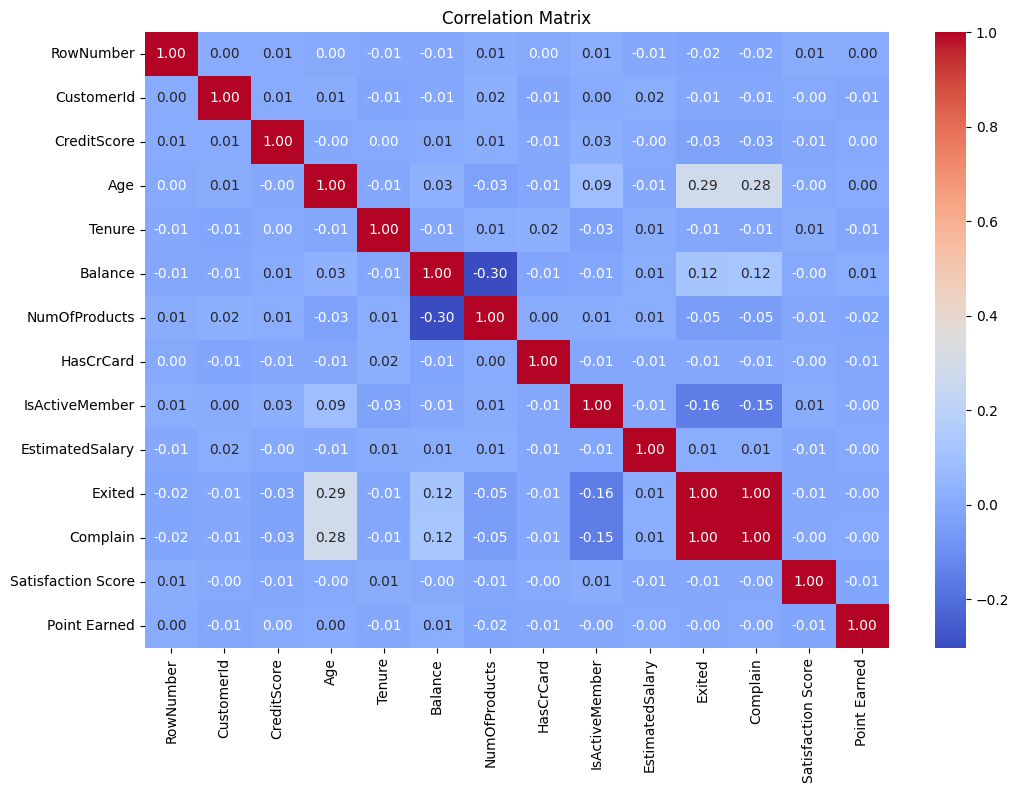

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


In [155]:
# Check correlation between numerical columns with respect to the each other

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values of all features with respect to 'Price'
print(corr_matrix['Exited'].sort_values(ascending=False))


From the heatmap above, we can see that rate of exit of customers and complaints are heavily correlated, with a relation of 99.5%.
Age also has a role to play in rate of exit as the correlation between both is appoximately 29%.
This implies that younger people are more likely to leave the bank.


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def prepare_data(data):
    # Data preprocessing
    # Drop unnecessary columns
    cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
    data = data.drop(cols_to_drop, axis=1)
    
    # Convert categorical variables to numeric
    data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
    
    # Create dummy variables for categorical columns
    geography_dummies = pd.get_dummies(data['Geography'], prefix='Geography')
    card_type_dummies = pd.get_dummies(data['Card Type'], prefix='Card_Type')
    
    # Drop original categorical columns and concatenate dummy variables
    data = data.drop(['Geography', 'Card Type'], axis=1)
    data = pd.concat([data, geography_dummies, card_type_dummies], axis=1)
    
    # Split features and target
    X = data.drop('Exited', axis=1)
    y = data['Exited']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, list(X.columns)



In [180]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    if auc_score:
        print(f"AUC-ROC Score: {auc_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, accuracy, auc_score


# Define models to test
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Print comparison summary
print("\nModel Comparison Summary:")
print("-" * 50)
print("{:<20} {:<15} {:<15}".format("Model", "Accuracy", "AUC-ROC"))
print("-" * 50)
for model_name, metrics in results.items():
    auc = metrics['auc'] if metrics['auc'] is not None else 'N/A'
    print("{:<20} {:<15.4f} {:<15}".format(
        model_name, 
        metrics['accuracy'],
        f"{auc:.4f}" if isinstance(auc, float) else auc
    ))

# joblib.dump(best_model_data, 'best_churn_prediction_model.pkl')

print(f"\nBest performing model: ({best_model_name})")


Model Comparison Summary:
--------------------------------------------------
Model                Accuracy        AUC-ROC        
--------------------------------------------------
Random Forest        0.9985          0.9996         
Logistic Regression  0.9985          0.9997         
Support Vector Machine 0.9985          0.9994         
Decision Tree        0.9974          0.9957         
K-Nearest Neighbors  0.9087          0.9365         

Best performing model: (Random Forest)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3714827-0ecf-40ae-b349-51c1ce81ff3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>